# Using Python for data analysis

## Dirk Boonzajer Flaes

# About me (Python-wise)
I used python during my PhD:
* for all data acquisition
* for all data analysis
* Very happy with the performance
* All data analysis of Grin fiber PRL has been done in Python
* Would love for you to try it out: [try it out at try.jupyter.org](try.jupyter.org)
* Wrote some libraries to help processing transmission matrices which will be available online for whoever wants to use it


# Outline of this talk

* Motivation
* Introduce Python
    * Functions
    * Working with matrices: Numpy
    * Working with a video
    * Package management
* Ultimate aim: That you give python a try


# About Python

* Developed in early 1990's by Guido van Rossum (Netherlands!)
* General purpose language designed to be easy to use
* Not just data analysis, applications range from:
    * Website hosting (such as [youtube](www.youtube.com)
    * Data science
    * Instrument control (through [pyVISA](https://pyvisa.readthedocs.io/en/master/))
    * ... lots of other stuff available as well
* Open source, free as in speech and free as in beer (PSF license, compatible with GPL)
    * Means a 'free' graphics card every two years if you ditch matlab ;)

# Jupyter notebook

* Lots of different editors available
* Can be daunting at first, recommend starting out with spyder and mainly jupyter 
* I mainly use Jupyter, which can even run matlab code
* Latest convert: Large Synoptic Survey Telescope will host jupyter notebooks to do data analysis on a supercomputer from your laptop

![Image of Yaktocat](./nature_jupyter.png)


# Getting started

* Is easy! Just go to try.jupyter.org, no installation required!
* Getting it to work properly:
    * Install anaconda
    * Install jupyter lab
    * Install dependencies (I have a script)
    * Run jupyter lab and you're good to go

# Why would you change?

Compared to Matlab, Python is...
* Proper programming language
* Easier to share and reproduce on different machines
* Often more readable as indentation is required

* Lots of different versions and IDE's  available. I recommend:
    * [jupyter notebook](https://jupyter.org/) for exploratory analysis
    * [Pycharm](Pycharm.org) for coding and debugging
    * [Spyder](Spyder.org) for matlab-like interface
    * [conda](https://www.anaconda.com/) for installation
    

# Python 101

In [1]:
# create a variable
a = 2
# and another one
b = 3
# add them
c = a + b
# show the result
print(c)

5


# Python 101

Let's create a function and run it

In [2]:
# write a function
def add(a, b):
    " Add two numbers a and b and return their sum "
    return a + b

add(1,2)

3

In [3]:
def subtract(a, b):
    " Subtract two numbers and return the difference "
    return a - b

subtract(1,2)

-1

* Indentation is mandatory (4 spaces)
* Docstring is optional but should be mandatory
* return type can be anything

# Keyword arguments

* Alter normal behaviour of a function.

In [4]:
def add(a, b, printit=False):
    """ Add two numbers a and b and return their sum.
    If printit==True, print the result as well.
    """
    result = a + b
    if printit:
        print('The result of a + b = ', result)
    return result

print(add(2,3))
add(2, 3, True)
add(2, 3, printit=True)

5
The result of a + b =  5
The result of a + b =  5


5

# Variable number of arguments

* Supply any number of input points
* keyword argument still works!

In [5]:
def add_all(*args, printit=False):
    """ 
    Return the sum of the input arguments.
    If printit==True, the result is printed as well.
    """
    result = 0*args[0]
    for number in args:
        result += number
    if printit:
        print('The sum of the inputs is %g.' % result)
    return result

print(add_all(1,2,3))
add_all(1,2,3,4,5, printit=True)

6
The sum of the inputs is 15.


15

# Package management

* Store relevant functions together in a single file
* Give file a meaningful name
* Use it in the notebook, or a different python file:

In [6]:
from adder_subtractor import add_all
add_all(2,3,4,5,6)


20

* Can even be in a package 
* Easy to share

# Package management

Put functions with similar names in a file and import it
```python
    import my_awesome_library
    from my_awesome_library import add
```
## Difference with Matlab:
* Any number of functions allowed
* Can be called from any location
* Packages can be installed on the entire system
* Installing most external packages requires _one_ command:
    ```bash 
    pip install packagename
    ```
    * Or even
    ```bash 
    pip install URL
    ```

# Real-world example

Basic preprocessing of a transmission matrix requires about 20 functions.

![alt](drawing.svg)

# Scientific Python 101
* First, tell python we want to do number crunching
* Default library: numpy (matlab-like functions)

In [7]:
# make a nice style for plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [8]:
import numpy as np # import numerical stuff
import matplotlib.pyplot as plt # import plotting stuff

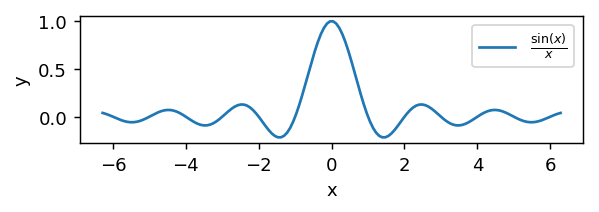

In [9]:
fig = plt.figure(figsize=(5,1.3), dpi=130)
x = np.linspace(-2*np.pi, 2*np.pi,150)
y = np.sinc(x)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y, label=r'$\frac{\sin(x)}{x}$')
plt.legend()

# Getting started in matlab-experience?

Don't like these imports? There's a package you can import to do it for you! ;)


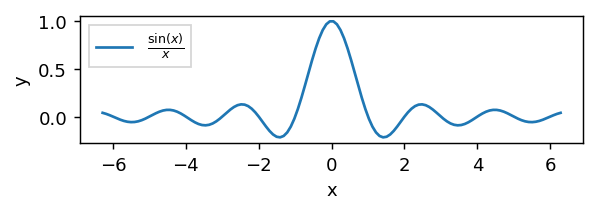

In [10]:
from pylab import *
figure(figsize=(5,1.3), dpi=130)
x = linspace(-2*pi, 2*pi,130)
y = sinc(x)
xlabel('x')
ylabel('y')
plot(x,y, label=r'$\frac{\sin(x)}{x}$')
legend(loc=2, fancybox=False); 
show()

# Arrays in python


* More information: (quickstart guide)https://docs.scipy.org/doc/numpy/user/quickstart.html
* Differences with matlab: [elaborate overview](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html)
* Matlab-to-python cheatsheet: [cheatsheet](http://mathesaurus.sourceforge.net/matlab-python-xref.pdf)


In [11]:
np.set_printoptions(precision=2)

In [12]:
# create two arrays
a = np.array([1,2,3,4,5,6,7,8,9,10])
b = np.cos(a/2/pi)
# access the first element
print('First element: ', a[0])
# multiplication, same as .* in matlab
a_times_b = a*b
# dot product
a_dot_b = a@b
# dot product, option 2
a_dot_b == a.dot(b)
print(a_dot_b)
assert(a.dot(b)==a@b)

First element:  1
22.199079362825653


## Broadcasting
Sometimes, you want to perform the same operation on all collumns/rows of a matrix. This can be done in an easy way, using _broadcasting_.

In [13]:
a = np.array([[1,2,3],[2,3,4]])
b = np.array([0.5, 1, 2])
print('a:')
print(a)
print('b:', b)

a:
[[1 2 3]
 [2 3 4]]
b: [0.5 1.  2. ]


## Broadcasting
Sometimes, you want to perform the same operation on all collumns/rows of a matrix. This can be done in an easy way, using _broadcasting_.

In [14]:
# we can divide a by b, numpy figures out along which axis
# slow way, dont use this!
c = 0*a
for i in range(2):
    c[i] = a[i]/b
    
print('a:\n', a)
print('b:\n', b)
print('c:\n', c)

a:
 [[1 2 3]
 [2 3 4]]
b:
 [0.5 1.  2. ]
c:
 [[2 2 1]
 [4 3 2]]


## Broadcasting
Sometimes, you want to perform the same operation on all collumns/rows of a matrix. This can be done in an easy way, using _broadcasting_.

In [15]:
# fast way
c = a / b
c

array([[2. , 2. , 1.5],
       [4. , 3. , 2. ]])

# Movie example!!

# Reshaping arrays

* Can be with np.reshape
* Also possible to access the .shape attribute in most cases

In [16]:
my_huge_matrix = np.random.rand(50,50,250,250)

In [17]:
print('initial shape: ', my_huge_matrix.shape)
ny, _, nx, _ = my_huge_matrix.shape
my_huge_matrix.shape = ny*ny, nx*nx
print(my_huge_matrix.shape)
my_huge_matrix[0,0] = 55
my_huge_matrix.shape = ny, ny, nx, nx
print(my_huge_matrix[0,0,0,0])

initial shape:  (50, 50, 250, 250)
(2500, 62500)
55.0


## Reshaping is _fast_

In [18]:
my_huge_matrix = np.random.rand(50,50,250,250)
print('initial shape: ', my_huge_matrix.shape)
print(my_huge_matrix.shape)

initial shape:  (50, 50, 250, 250)
(50, 50, 250, 250)


In [19]:
%%timeit
my_huge_matrix.shape = ny*ny, nx*nx
my_huge_matrix[0,0] = 55
my_huge_matrix.shape = ny,ny, nx,nx

1.46 µs ± 28.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## For the experts: keeping two views

Create two arrays that share each other's memory.

In [20]:
my_huge_matrix = np.random.rand(50,50,250,250)

In [21]:
# Create an reference with a different shape but the same memory
matrix_view = my_huge_matrix.view()
matrix_view.shape = 50*50,250,250
print('huge_matrix shape:', my_huge_matrix.shape)
print('view.shape:', matrix_view.shape)
matrix_view[0,0,0] = 53
print(my_huge_matrix[0,0,0,0])

huge_matrix shape: (50, 50, 250, 250)
view.shape: (2500, 250, 250)
53.0


# Where do I find ...

* Image processing?
    * Basic:
    ```python 
    from scipy import ndimage```
    * More advanced: scikits-image; 
    ```python
       import skimage```
* Reading/loading files?
    * image i/o module : 
    ```python
    import imageio``` 
    * Matlab files: `from scipy.io import loadmat`
    * Hdf5: import h5py
    * text files: numpy, `np.loadtxt`
* Special functions (bessel, laguerre-gaussian, etc):
    * ```scipy.special```
    * most of it is implemented in numpy, just try `np.<my_function>`
* Complex field visualisation?
    * Ask dirk, he'll send you a link
* Fancy library for transmission matrix alignment/analysis
    * Ask Dirk, he'll send you the link.
* Found some cool stuff? Adding a package?
    * You just type `!conda install <my package name>`
    

# Advanced concepts I'm happy to talk about but not now:

   * yield statement
   * object oriented programming
   * GPU programming
   * how to create a shareable package
   * (version control)
   * parallel processing
   * Speeding code up with Cython and the @jit decorator


# Looking for Some feature [my feature]?

1. Someone probably made it already
2. Spend some time finding it on github


# Speeding up parts of python

* First rule: don't do any premature optimization, first find the functions that require most of the execution time after everything works
* Use memoization for functions that are called a lot
* Cython can be used to code in C [tutorial](http://docs.cython.org/en/latest/src/tutorial/numpy.html)
* Time small pieces with the `%timeit` magic

In [22]:
from scipy.special import jv, kv

In [23]:
a = np.mgrid[-32:32, -32:32] / 32.

In [24]:
%%timeit 
for i in range(23):
    jv(i,a.flat) / kv(i,a.flat)


192 ms ± 2.32 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
